## Temperature 2m above surface

Exploring the data of var167 for both slo0059 and tes0004 and playing around with different types of plots to this. 

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.ticker as mticker
import os
import cartopy.crs as ccrs

In [2]:
ds=xr.open_dataset('/nird/datalake/NS1004K/elihho/tes0004_echam6_BOT_mm_0_1850_var167.nc')
da=xr.open_dataset('/nird/datalake/NS1004K/elihho/slo0059_echam6_BOT_mm_0_1850_var167.nc')
da.time.head

<bound method DataArray.head of <xarray.DataArray 'time' (time: 22200)> Size: 178kB
array([70010131.994444, 70010228.994444, 70010331.994444, ..., 88501031.994444,
       88501130.994444, 88501231.994444])
Coordinates:
  * time     (time) float64 178kB 7.001e+07 7.001e+07 ... 8.85e+07 8.85e+07
Attributes:
    standard_name:  time
    units:          day as %Y%m%d.%f
    calendar:       proleptic_gregorian
    axis:           T>

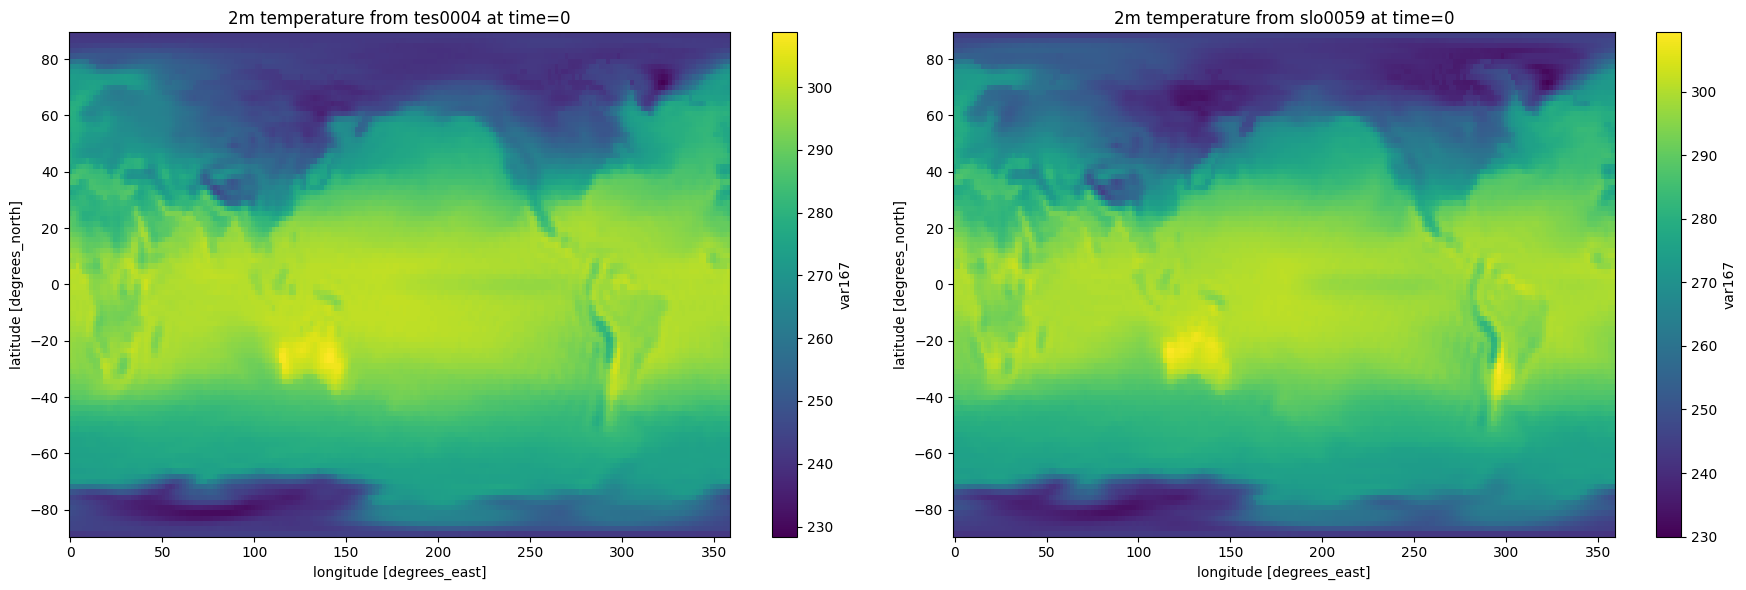

In [3]:
var_tes = ds['var167']
var_slo = da['var167']

# Select a single time step (e.g., the first one)
single_time = var_tes.isel(time=0)
st=var_slo.isel(time=0)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot each time slice
single_time.plot(ax=ax[0], cmap='viridis')
ax[0].set_title("2m temperature from tes0004 at time=0")

st.plot(ax=ax[1], cmap='viridis')
ax[1].set_title("2m temperature from slo0059 at time=0")

plt.tight_layout()
plt.show()

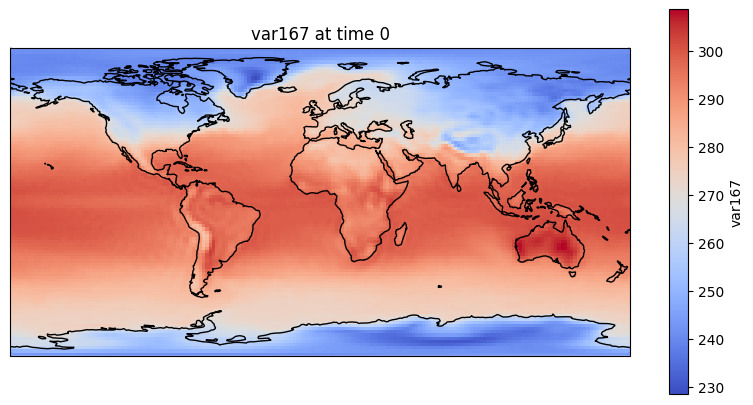

In [4]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Select a time slice
data = ds['var167'].isel(time=0)

# Plot
data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'var167'})
ax.coastlines()
ax.set_title('var167 at time 0')
plt.show()

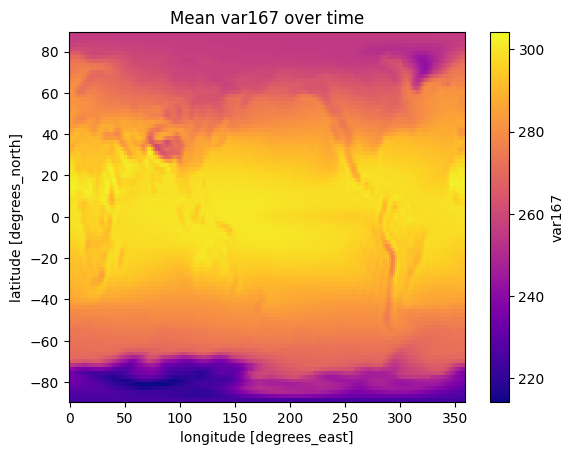

In [5]:
mean_map = ds['var167'].mean(dim='time')
mean_map.plot(cmap='plasma')
plt.title("Mean var167 over time")
plt.show()

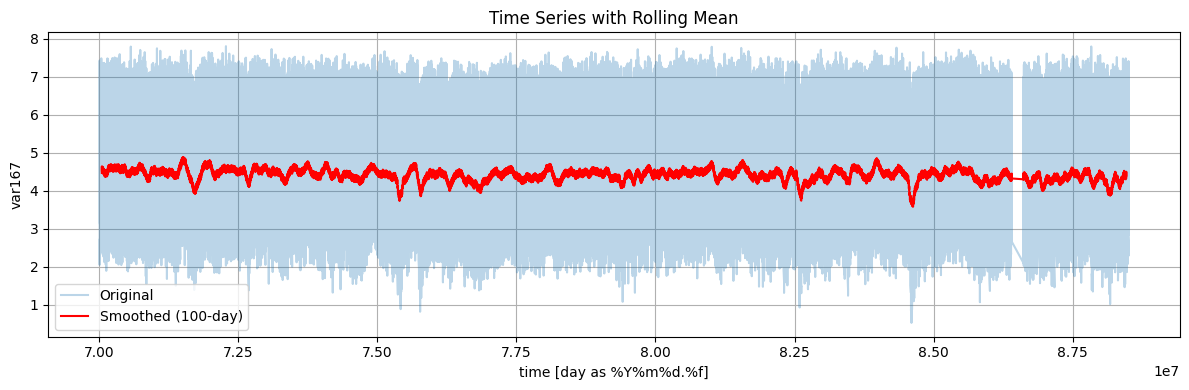

In [6]:
ts = ds["var167"].mean(dim=["lat", "lon"])-273.12
smoothed = ts.rolling(time=100, center=True).mean()

plt.figure(figsize=(12, 4))
ts.plot(label="Original", alpha=0.3)
smoothed.plot(label="Smoothed (100-day)", color='red')
plt.title("Time Series with Rolling Mean")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

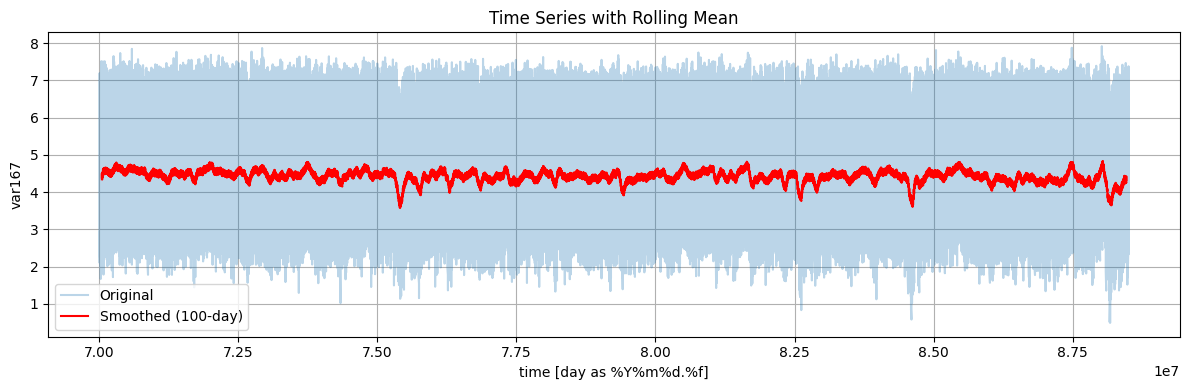

In [7]:
ts1 = da["var167"].mean(dim=["lat", "lon"])-273.12
smoothed = ts1.rolling(time=100, center=True).mean()

plt.figure(figsize=(12, 4))
ts1.plot(label="Original", alpha=0.3)
smoothed.plot(label="Smoothed (100-day)", color='red')
plt.title("Time Series with Rolling Mean")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
last_date_num = 88501231
first_date_num = 70010131

total_days_num = last_date_num - first_date_num  # ~ 18491100

total_years = 1850  # from 0 to 1850

# Calculate how many "numeric units" per year
units_per_year = total_days_num / total_years  # ~ 9995 units/year

# Now calculate the numeric value corresponding to year 1250 and 1750
def year_to_numeric(year):
    return first_date_num + year * units_per_year

numeric_1250 = year_to_numeric(1250)
numeric_1850 = year_to_numeric(1850)

print(f"Numeric time for year 1250: {numeric_1250}")
print(f"Numeric time for year 1850: {numeric_1850}")

Numeric time for year 1250: 82504117.4864865
Numeric time for year 1850: 88501231.0


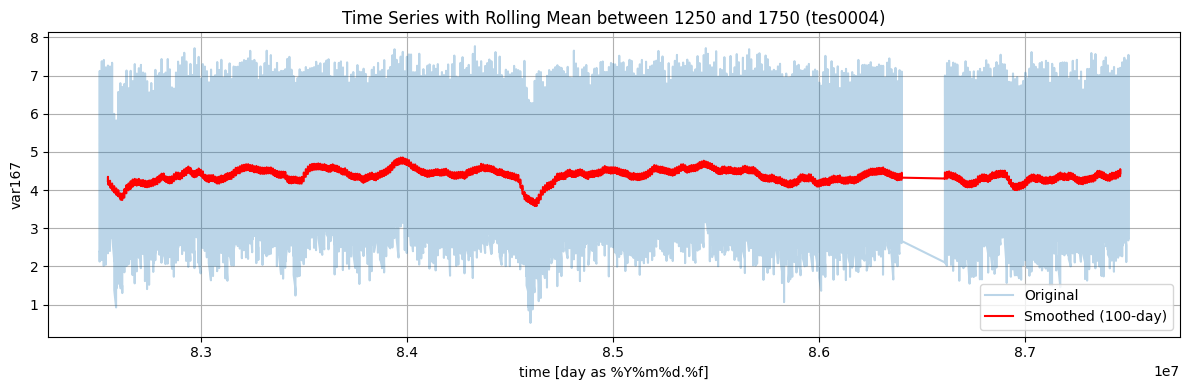

In [9]:
time_1250 = 82504117.4864865  
time_1750 = 87501712.08108108  

time_mask = (ds.time >= time_1250) & (ds.time <= time_1750)
ts_1250_1750 = ds['var167'].sel(time=time_mask).mean(dim=['lat', 'lon']) - 273.12
smoothed = ts_1250_1750.rolling(time=100, center=True).mean()

plt.figure(figsize=(12, 4))
ts_1250_1750.plot(label="Original", alpha=0.3)
smoothed.plot(label="Smoothed (100-day)", color='red')
plt.title("Time Series with Rolling Mean between 1250 and 1750 (tes0004)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

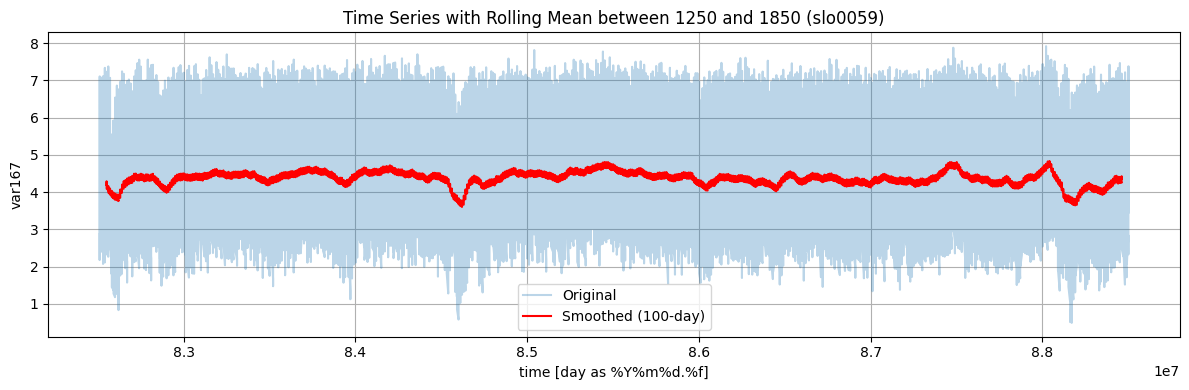

In [10]:
time_1250 = 82504117.4864865  
time_1850 = 88501231.0 

time_mask = (da.time >= time_1250) & (da.time <= time_1850)
ts_1250_1850 = da['var167'].sel(time=time_mask).mean(dim=['lat', 'lon']) - 273.12
smoothed = ts_1250_1850.rolling(time=100, center=True).mean()

plt.figure(figsize=(12, 4))
ts_1250_1850.plot(label="Original", alpha=0.3)
smoothed.plot(label="Smoothed (100-day)", color='red')
plt.title("Time Series with Rolling Mean between 1250 and 1850 (slo0059)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

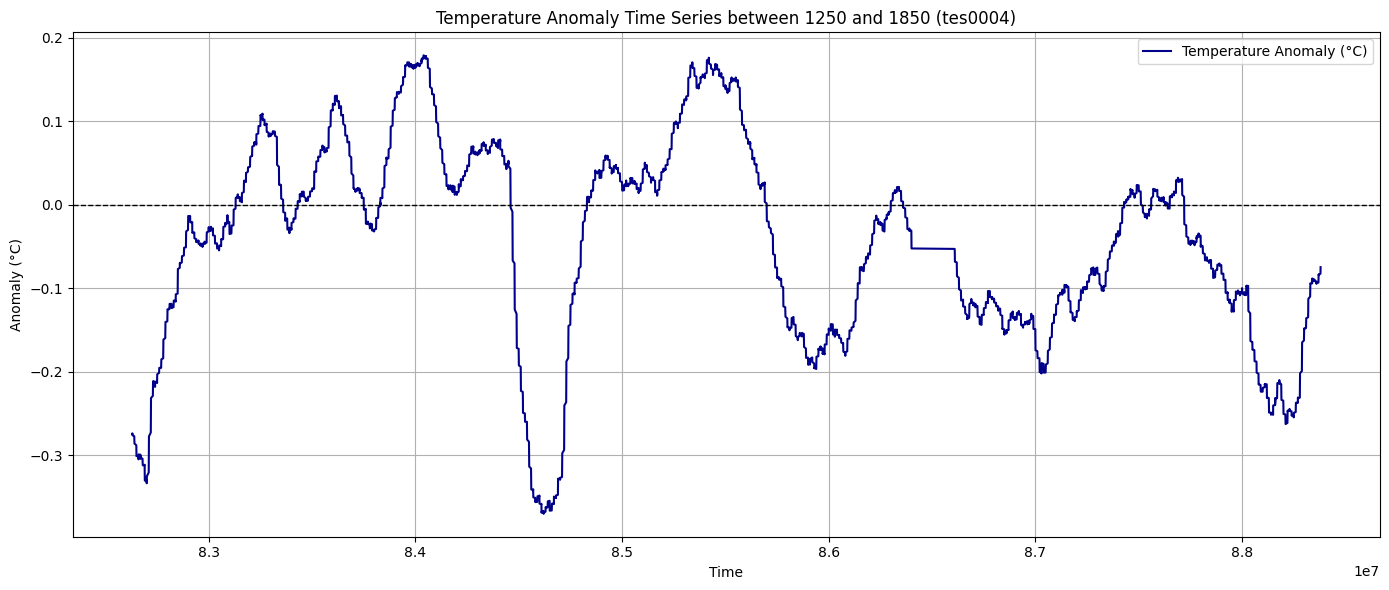

In [11]:
baseline = ts.mean()
anomaly = ts.sel(time=(ds.time >= time_1250) & (ds.time <= numeric_1850)) - baseline

anomaly_smoothed = anomaly.rolling(time=300, center=True).mean()

plt.figure(figsize=(14, 6))
anomaly_smoothed.plot(label='Temperature Anomaly (°C)', color='darkblue')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Temperature Anomaly Time Series between 1250 and 1850 (tes0004)')
plt.ylabel('Anomaly (°C)')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

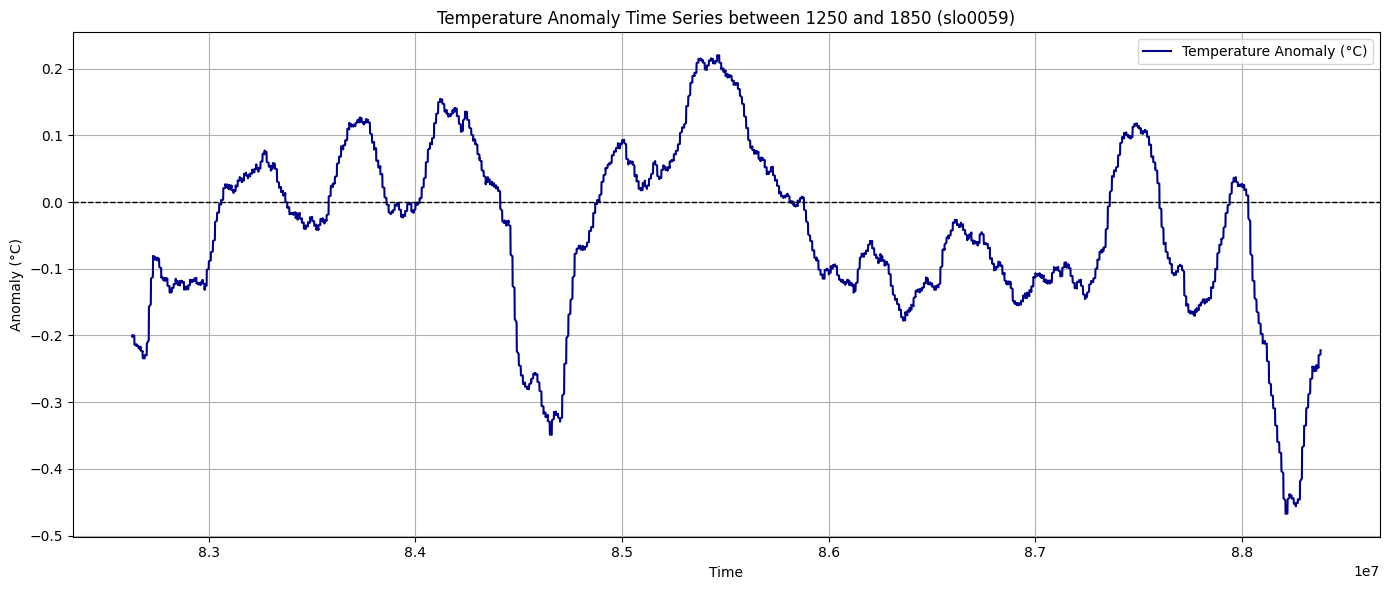

In [12]:
baseline1 = ts1.mean()
anomaly1 = ts1.sel(time=(da.time >= time_1250) & (da.time <= numeric_1850)) - baseline1

anomaly_smoothed1 = anomaly1.rolling(time=300, center=True).mean()

plt.figure(figsize=(14, 6))
anomaly_smoothed1.plot(label='Temperature Anomaly (°C)', color='darkblue')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Temperature Anomaly Time Series between 1250 and 1850 (slo0059)')
plt.ylabel('Anomaly (°C)')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

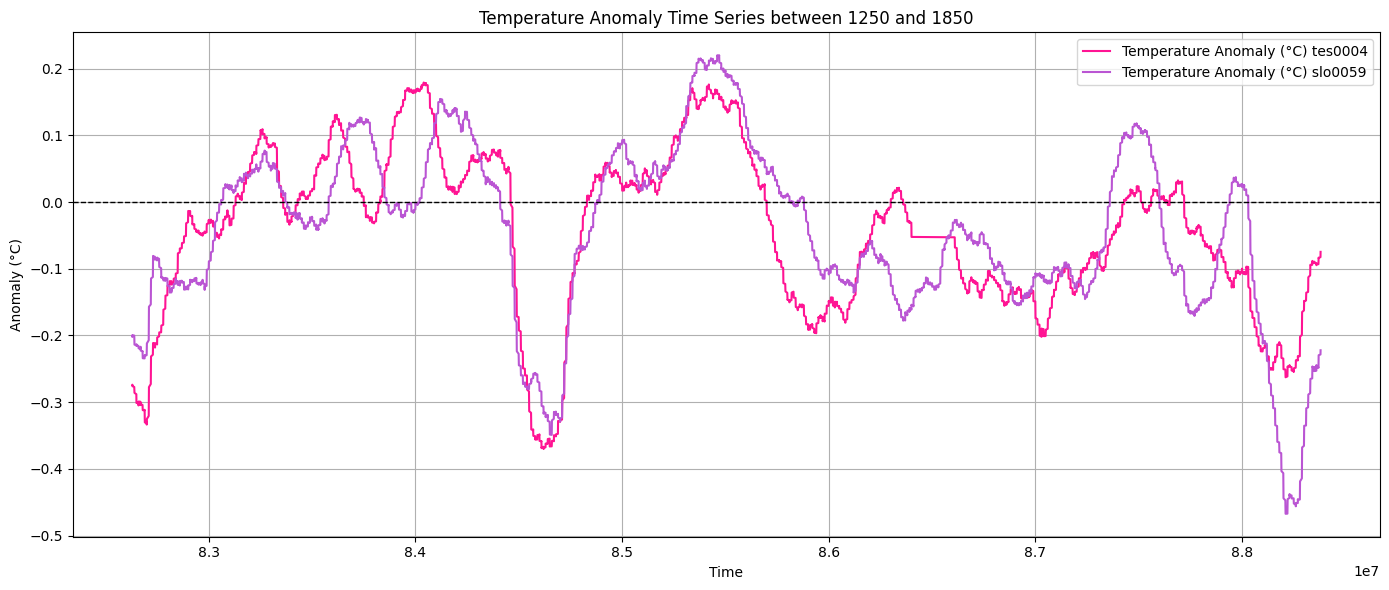

In [13]:
plt.figure(figsize=(14, 6))
anomaly_smoothed.plot(label='Temperature Anomaly (°C) tes0004', color='deeppink')
anomaly_smoothed1.plot(label='Temperature Anomaly (°C) slo0059', color='mediumorchid')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Temperature Anomaly Time Series between 1250 and 1850')
plt.ylabel('Anomaly (°C)')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
float_time = ds.time.values
int_time = float_time.astype(int)  # Take only YYYYMMDD

# Extract year by integer division
raw_years = int_time // 10000

# Correct offset: map to actual years (e.g., 7001 → 1001)
years = raw_years - 7000

In [15]:
volcano = [1257, 1262, 1280, 1362, 1452, 1458, 1477, 1480, 1563, 1580, 1586, 1593, 
           1600, 1625, 1630, 1631, 1640, 1641, 1652, 1660, 1663, 1667, 1673, 1680, 
           1701, 1721, 1739, 1755, 1800, 1808, 1815, 1822, 1831, 1835, 1843]
volcano_times = ds.time.values[np.isin(years, volcano)]

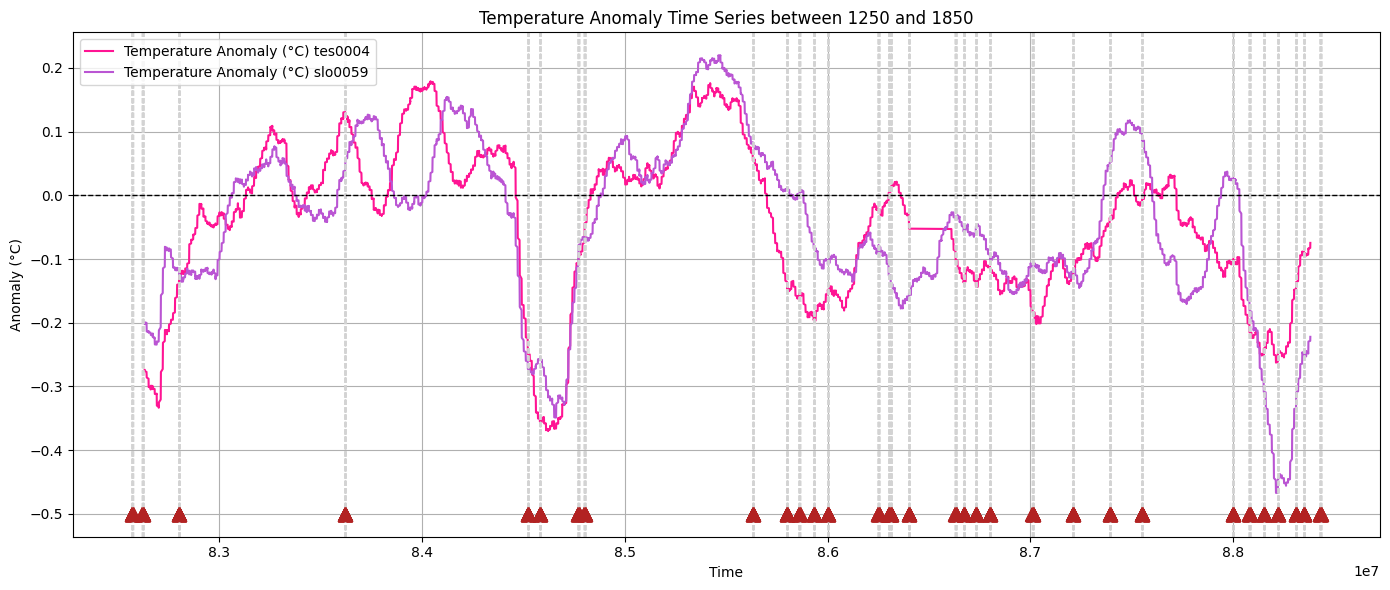

In [16]:
plt.figure(figsize=(14, 6))

# Plot anomalies
anomaly_smoothed.plot(label='Temperature Anomaly (°C) tes0004', color='deeppink')
anomaly_smoothed1.plot(label='Temperature Anomaly (°C) slo0059', color='mediumorchid')

# Add red triangle markers at volcanic years
for vt in volcano_times:
    plt.axvline(x=vt, color='lightgray', linestyle='--', linewidth=1)
    plt.plot(vt, -0.5, marker='^', color='firebrick', markersize=10) 

# Add zero line
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Labels and legend
plt.title('Temperature Anomaly Time Series between 1250 and 1850')
plt.ylabel('Anomaly (°C)')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Surface temperatures

In [17]:
ds_surf = xr.open_dataset('/nird/datalake/NS1004K/elihho/tes0004_echam6_BOT_mm_0_1850_var169.nc')
da_surf = xr.open_dataset('/nird/datalake/NS1004K/elihho/slo0059_echam6_BOT_mm_0_1850_var169.nc')

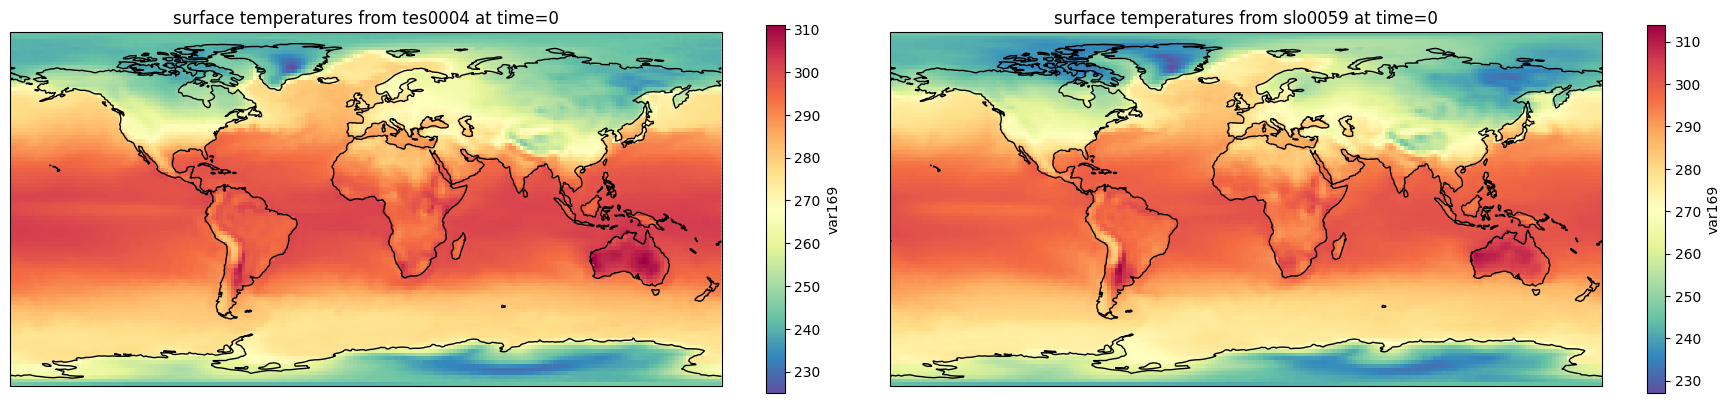

In [18]:
fig, ax = plt.subplots(1,2, figsize=(18, 4), subplot_kw={'projection': ccrs.PlateCarree()})
ds_surf['var169'].isel(time=0).plot(ax=ax[0], transform=ccrs.PlateCarree(), cmap='Spectral_r')
ax[0].coastlines()
ax[0].set_title('surface temperatures from tes0004 at time=0')

da_surf['var169'].isel(time=0).plot(ax=ax[1], transform=ccrs.PlateCarree(), cmap='Spectral_r')
ax[1].coastlines()
ax[1].set_title('surface temperatures from slo0059 at time=0')

plt.tight_layout()
plt.show()

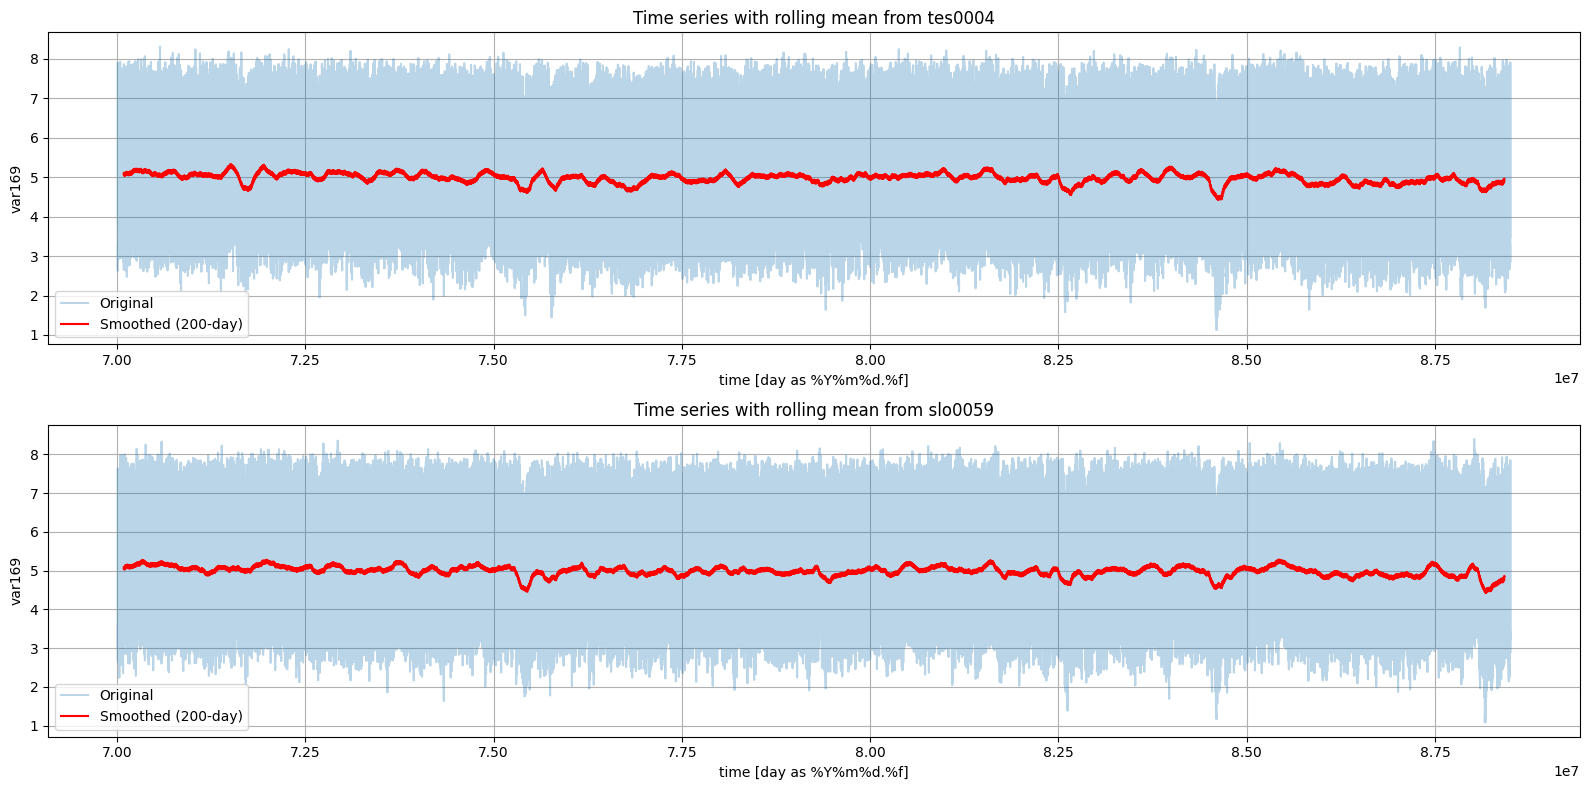

In [19]:
ts_surf=ds_surf['var169'].mean(dim=['lat', 'lon'])-273.12
smoothed_surf=ts_surf.rolling(time=200, center=True).mean()

ts_surfa=da_surf['var169'].mean(dim=['lat', 'lon'])-273.12
smoothed_surfa=ts_surfa.rolling(time=200, center=True).mean()

fig, ax=plt.subplots(2,1, figsize=(16, 8))
ts_surf.plot(ax=ax[0], label='Original', alpha=0.3)
smoothed_surf.plot(ax=ax[0], label='Smoothed (200-day)', color='red')
ax[0].legend()
ax[0].set_title('Time series with rolling mean from tes0004')
ax[0].grid(True)

ts_surfa.plot(ax=ax[1], label='Original', alpha=0.3)
smoothed_surfa.plot(ax=ax[1], label='Smoothed (200-day)', color='red')
ax[1].legend()
ax[1].set_title('Time series with rolling mean from slo0059')
ax[1].grid(True)

plt.tight_layout()
plt.show()

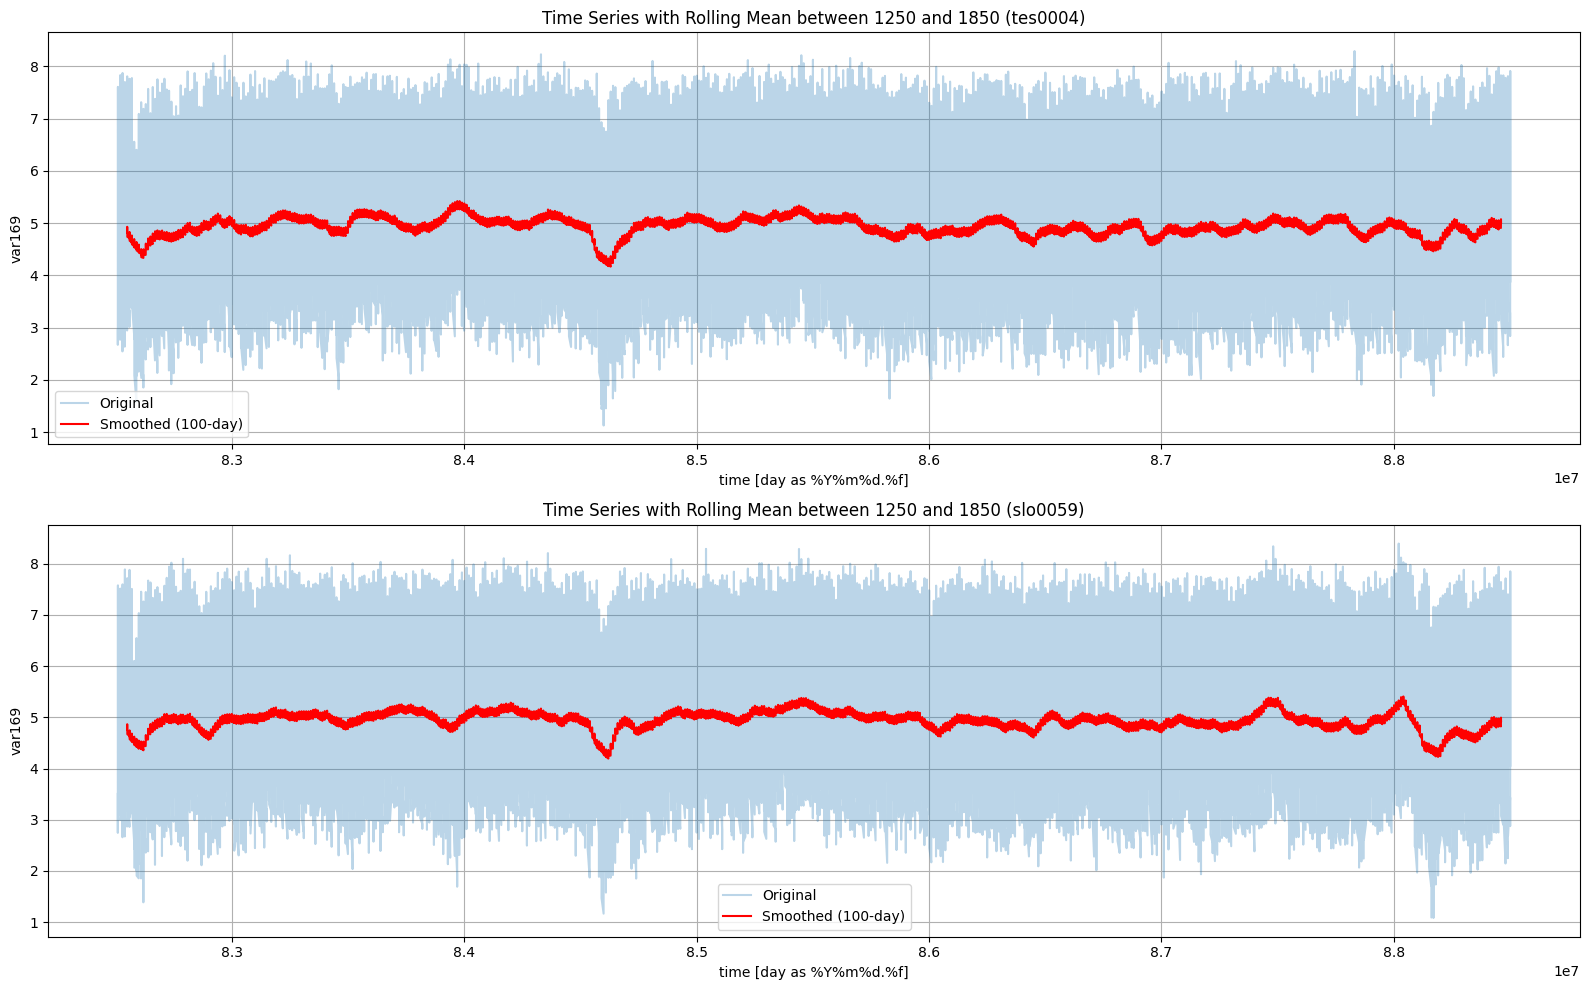

In [20]:
time_1250 = 82504117.4864865  
time_1850 = 88501231.0   

time_mask_s = (ds_surf.time >= time_1250) & (ds_surf.time <= time_1850)
ts_surf_1250_1850 = ds_surf['var169'].sel(time=time_mask_s).mean(dim=['lat', 'lon']) - 273.12
smoothed = ts_surf_1250_1850.rolling(time=100, center=True).mean()

time_mask_sa = (da_surf.time >= time_1250) & (da_surf.time <= time_1850)
ts_surfa_1250_1850 = da_surf['var169'].sel(time=time_mask_sa).mean(dim=['lat', 'lon']) - 273.12
smoothed_a = ts_surfa_1250_1850.rolling(time=100, center=True).mean()

fig, ax= plt.subplots(2,1, figsize=(16, 10))
ts_surf_1250_1850.plot(ax=ax[0], label="Original", alpha=0.3)
smoothed.plot(ax=ax[0], label="Smoothed (100-day)", color='red')
ax[0].set_title("Time Series with Rolling Mean between 1250 and 1850 (tes0004)")
ax[0].legend()
ax[0].grid(True)

ts_surfa_1250_1850.plot(ax=ax[1], label="Original", alpha=0.3)
smoothed_a.plot(ax=ax[1], label="Smoothed (100-day)", color='red')
ax[1].set_title("Time Series with Rolling Mean between 1250 and 1850 (slo0059)")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

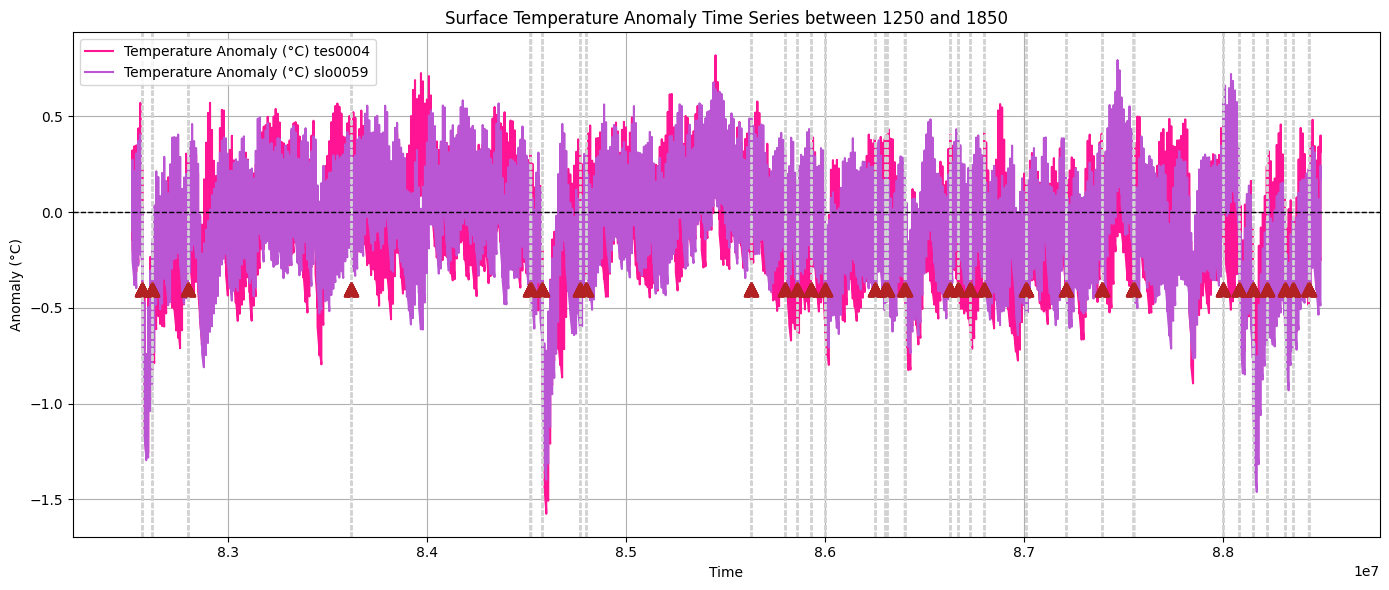

In [21]:
base_surf = ts_surf.mean()
anomaly_surf=ts_surf.sel(time=time_mask_s) - base_surf
anomaly_smooth_surf = anomaly_surf.rolling(time=30, center=True).mean()

base_surfa = ts_surfa.mean()
anomaly_surfa=ts_surfa.sel(time=time_mask_sa) - base_surfa
anomaly_smooth_surfa = anomaly_surfa.rolling(time=30, center=True).mean()

plt.figure(figsize=(14, 6))

# Plot anomalies
anomaly_smooth_surf.plot(label='Temperature Anomaly (°C) tes0004', color='deeppink')
anomaly_smooth_surfa.plot(label='Temperature Anomaly (°C) slo0059', color='mediumorchid')

# Add red triangle markers at volcanic years
for vt in volcano_times:
    plt.axvline(x=vt, color='lightgray', linestyle='--', linewidth=1)
    plt.plot(vt, -0.4, marker='^', color='firebrick', markersize=10) 

# Add zero line
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Labels and legend
plt.title('Surface Temperature Anomaly Time Series between 1250 and 1850')
plt.ylabel('Anomaly (°C)')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
numeric_1250 = year_to_numeric(1250)
numeric_1270 = year_to_numeric(1270)

print(f"Numeric time for year 1250: {numeric_1250}")
print(f"Numeric time for year 1270: {numeric_1270}")

Numeric time for year 1250: 82504117.4864865
Numeric time for year 1270: 82704021.27027027


In [23]:
numeric_1450 = year_to_numeric(1450)
numeric_1470 = year_to_numeric(1470)

print(f"Numeric time for year 1450: {numeric_1450}")
print(f"Numeric time for year 1470: {numeric_1470}")

Numeric time for year 1450: 84503155.32432432
Numeric time for year 1470: 84703059.1081081


In [24]:
numeric_1805 = year_to_numeric(1805)
numeric_1825 = year_to_numeric(1825)

print(f"Numeric time for year 1805: {numeric_1805}")
print(f"Numeric time for year 1825: {numeric_1825}")

Numeric time for year 1805: 88051447.4864865
Numeric time for year 1825: 88251351.27027027


In [36]:
base_surf = ts_surf.mean()
base_surfa = ts_surfa.mean()

# anomalies
time_mask_s1 = (ds_surf.time >= numeric_1250) & (ds_surf.time <= numeric_1270)
anomaly_surf1=ts_surf.sel(time=time_mask_s1) - base_surf
anomaly_smooth_surf1 = anomaly_surf1.rolling(time=1, center=True).mean()

time_mask_sa1 = (da_surf.time >= numeric_1250) & (da_surf.time <= numeric_1270)
anomaly_surfa1=ts_surfa.sel(time=time_mask_sa1) - base_surfa
anomaly_smooth_surfa1 = anomaly_surfa1.rolling(time=1, center=True).mean()


time_mask_s2 = (ds_surf.time >= numeric_1450) & (ds_surf.time <= numeric_1470)
anomaly_surf2=ts_surf.sel(time=time_mask_s2) - base_surf
anomaly_smooth_surf2 = anomaly_surf2.rolling(time=1, center=True).mean()

time_mask_sa2 = (da_surf.time >= numeric_1450) & (da_surf.time <= numeric_1470)
anomaly_surfa2=ts_surfa.sel(time=time_mask_sa2) - base_surfa
anomaly_smooth_surfa2 = anomaly_surfa2.rolling(time=1, center=True).mean()


time_mask_s3 = (ds_surf.time >= numeric_1805) & (ds_surf.time <= numeric_1825)
anomaly_surf3=ts_surf.sel(time=time_mask_s3) - base_surf
anomaly_smooth_surf3 = anomaly_surf3.rolling(time=1, center=True).mean()

time_mask_sa3 = (da_surf.time >= numeric_1805) & (da_surf.time <= numeric_1825)
anomaly_surfa3=ts_surfa.sel(time=time_mask_sa3) - base_surfa
anomaly_smooth_surfa3 = anomaly_surfa3.rolling(time=1, center=True).mean()

Text(0.5, 0, 'Year')

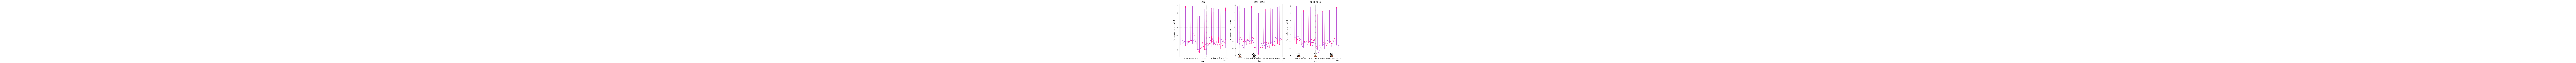

In [38]:
volcano_img = mpimg.imread("volcano.png")
volcano_icon = OffsetImage(volcano_img, zoom=0.05)

fig, ax = plt.subplots(1,3, figsize=(18,6))

# Plot anomalies
anomaly_smooth_surf1.plot(ax=ax[0], label='Temperature Anomaly (°C) tes0004', color='deeppink')
anomaly_smooth_surfa1.plot(ax=ax[0], label='Temperature Anomaly (°C) slo0059', color='mediumorchid')
volcano=[1257]
for vt in volcano_times:
    ax[0].axvline(x=vt, color='lightgray', linestyle='--', linewidth=1)
    ab0 = AnnotationBbox(volcano_icon, (vt, -4), frameon=False, box_alignment=(0.5, 0.5))
    ax[0].add_artist(ab0)
ax[0].set_xlim(numeric_1250, numeric_1270)
# Add zero line
ax[0].axhline(0, color='black', linestyle='--', linewidth=1)
ax[0].set_title('1257')
ax[0].set_ylabel('Temperature anomaly [K]')
ax[0].set_xlabel('Year')

anomaly_smooth_surf2.plot(ax=ax[1], label='Temperature Anomaly (°C) tes0004', color='deeppink')
anomaly_smooth_surfa2.plot(ax=ax[1], label='Temperature Anomaly (°C) slo0059', color='mediumorchid')
volcano=[1453, 1458]
for vt in volcano_times:
    ax[1].axvline(x=vt, color='lightgray', linestyle='--', linewidth=1)
    ab1 = AnnotationBbox(volcano_icon, (vt, -4), frameon=False, box_alignment=(0.5, 0.5))
    ax[1].add_artist(ab1) 
ax[1].set_xlim(numeric_1450, numeric_1470)

# Add zero line
ax[1].axhline(0, color='black', linestyle='--', linewidth=1)
ax[1].set_title('1453, 1458')
ax[1].set_ylabel('Temperature anomaly [K]')
ax[1].set_xlabel('Year')

anomaly_smooth_surf3.plot(ax=ax[2], label='Temperature Anomaly (°C) tes0004', color='deeppink')
anomaly_smooth_surfa3.plot(ax=ax[2], label='Temperature Anomaly (°C) slo0059', color='mediumorchid')
volcano=[1809, 1815]
for vt in volcano_times:
    ax[2].axvline(x=vt, color='lightgray', linestyle='--', linewidth=1)
    ab2 = AnnotationBbox(volcano_icon, (vt, -4), frameon=False, box_alignment=(0.5, 0.5))
    ax[2].add_artist(ab2) 

# Add zero line
ax[2].axhline(0, color='black', linestyle='--', linewidth=1)
ax[2].set_xlim(numeric_1805, numeric_1825)
ax[2].set_title('1809, 1815')
ax[2].set_ylabel('Temperature anomaly [K]')
ax[2].set_xlabel('Year')
